## What is the optimal level of implementation for each MPOWER measure, that is, which level provides the greatest value given the resource investment?

### Linear regression analysis:  
- Our team started from basic linear regression to find optimal level of MPOWER measurement

### Models Variants
- Model 1: Stop Smoking dataset, Usage dataset provided, remove duplicates, remove NAs, Linear Regression (split on year with most recent year being test). Raising tax and overall price of tobacco had lots of NAs, so it wasn't sufficient to use those column. Only using MPOWER with 'EnforceBansTobaccoAd', and 'HelpToQuit to predict tobacco usage.

 : Result was relatively unreliable, so decided to find something more.


- Model 2: Changing the target value from usage rate to actual number of population. Used WHO macro dataset to import population and multiplied by usage rate to find actual number of people who are smoking. 

 : Result was almost same as Model 1, and not relatively unreliable.


- Model 3: Returning to use Model 1's target value, since Model 2 is using another dataset from different sources. While analyzing the dataset, countries that are having the least MPOWER were mostly Africa region. Starting from this point, this model added 'region' as another feature. Since 'region' is categorical data and doesn't have inequality.
 
 : Result was surprising, and model improved a lot, having a coefficient of determination: 0.4039


- Model 4: Using previous features from Model 3, the team added other kinds of MPOWERs that were not provided in the Datathon. More information about MPOWER was available from WHO so added to see if MPOWERs that were not mentioned have an impact to the prediction model. This model found that raising tax rates have a positive impact on usage decrease. 

 : Coefficient of determination: 0.4653
 
 
[Final Model] 
- Model 5: Using previous features from Model 4, the team added sources other than MPOWER. Thinking of medical expenditure, government overall expenditure, and GDP per capita, those factors were included as additional factors. (Source: WHO dataset). 

 : Model improved as coefficient of determination: 0.5619
 

- Model 6: Adding educational maturity as another feature. However, data was not sufficient so it losses 1/3 of total dataset. Also, model didn't improved much, so the team decided to use Model 5 as a final model. 

 : coefficient of determination: 0.42

In [1]:
# Importing maching learning libraries
# Libraries include data spliting, machine learning algorithms, scoring metrics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

plt.style.use('seaborn')
sns.set(font_scale=2.5)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


stop_df = pd.read_csv('./stop_smoking.csv')
use_ww_df = pd.read_csv('./tobacco_use_ww.csv')

In [2]:
# Model 1: Stop Smoking dataset, Usage dataset provided, remove duplicates, remove NAs, 
# Linear Regression (split on year with most recent year being test if more than one year), 
# else just split 80/20 or 70/30

# starting from stop smoking dataset
stop_df.head(3)

,Entity,Code,Year,AvgCigarettePriceDollars,AvgTaxesAsPctCigarettePrice,EnforceBansTobaccoAd,HelpToQuit
0,Algeria,DZA,2012,1.84,47.0,4,3
1,Algeria,DZA,2014,2.09,40.9,4,4
2,Argentina,ARG,2012,2.79,69.9,4,4


In [3]:
# Remove null values: remove AvgPrice, AvgTax, and check duplicate
stop_df.info()
stop_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Entity                       774 non-null    object 
 1   Code                         774 non-null    object 
 2   Year                         774 non-null    int64  
 3   AvgCigarettePriceDollars     208 non-null    float64
 4   AvgTaxesAsPctCigarettePrice  209 non-null    float64
 5   EnforceBansTobaccoAd         774 non-null    int64  
 6   HelpToQuit                   774 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 42.5+ KB


Entity                           0
Code                             0
Year                             0
AvgCigarettePriceDollars       566
AvgTaxesAsPctCigarettePrice    565
EnforceBansTobaccoAd             0
HelpToQuit                       0
dtype: int64

In [4]:
# drop columns that have null values, and check null values: Done
stop_df.drop(['AvgCigarettePriceDollars', 'AvgTaxesAsPctCigarettePrice'], axis=1, inplace=True)
stop_df.isnull().sum().sum()

0

In [5]:
# checking duplicated rows: Done
stop_df.duplicated().sum()

0

In [6]:
# Note: We only have four years of MPOWER results (2007, 2010, 2012, 2014)
stop_df['Year'].value_counts().sort_index()

2007    193
2010    193
2012    194
2014    194
Name: Year, dtype: int64

In [7]:
len(stop_df['Entity'].unique())

194

In [8]:
# Moving on to usage dataset
use_ww_df.head(3)

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Year,Gender,Value
0,SEAR,South-East Asia,PRK,Democratic People's Republic of Korea,2018,Female,0.0
1,EUR,Europe,AZE,Azerbaijan,2018,Female,0.2
2,AFR,Africa,ERI,Eritrea,2018,Female,0.3


In [9]:
# no null data
use_ww_df.info()
use_ww_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4023 entries, 0 to 4022
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ParentLocationCode   4023 non-null   object 
 1   ParentLocation       4023 non-null   object 
 2   SpatialDimValueCode  4023 non-null   object 
 3   Location             4023 non-null   object 
 4   Year                 4023 non-null   int64  
 5   Gender               4023 non-null   object 
 6   Value                4023 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 220.1+ KB


ParentLocationCode     0
ParentLocation         0
SpatialDimValueCode    0
Location               0
Year                   0
Gender                 0
Value                  0
dtype: int64

In [10]:
# checking duplicated rows: None
use_ww_df.duplicated().sum()

0

In [11]:
# Note: We have 2000, 2005, 2010, 2013~2018 year data for the usage
# While we only have four years of MPOWER results (2007, 2010, 2012, 2014)
use_ww_df['Year'].value_counts().sort_index()

2000    447
2005    447
2010    447
2013    447
2014    447
2015    447
2016    447
2017    447
2018    447
Name: Year, dtype: int64

In [12]:
# Outer merge stop_df and use_ww_df, by entity and year
# change column name of usage dataset: Location -> Entity to ease merging
use_ww_df.rename(columns = {'Location' : 'Entity'}, inplace = True)

In [13]:
# Mergeing by inner join, which would only get data for years of 2010, 2014
model_1_df = stop_df.merge(use_ww_df, on = ['Entity', 'Year'])
model_1_df

,Entity,Code,Year,EnforceBansTobaccoAd,HelpToQuit,ParentLocationCode,ParentLocation,SpatialDimValueCode,Gender,Value
0,Algeria,DZA,2014,4,4,AFR,Africa,DZA,Female,1.6
1,Algeria,DZA,2014,4,4,AFR,Africa,DZA,Both sexes,19.4
2,Algeria,DZA,2014,4,4,AFR,Africa,DZA,Male,37.3
3,Argentina,ARG,2014,4,5,AMR,Americas,ARG,Female,18.9
4,Argentina,ARG,2014,4,5,AMR,Americas,ARG,Both sexes,25.6
...,...,...,...,...,...,...,...,...,...,...
817,Zambia,ZMB,2010,2,3,AFR,Africa,ZMB,Male,27.8
818,Zambia,ZMB,2010,2,3,AFR,Africa,ZMB,Female,5.6
819,Zimbabwe,ZWE,2010,2,3,AFR,Africa,ZWE,Female,1.9
820,Zimbabwe,ZWE,2010,2,3,AFR,Africa,ZWE,Both sexes,15.6


In [14]:
model_1_df['Year'].value_counts()

2010    411
2014    411
Name: Year, dtype: int64

In [15]:
# To simplifying target value, we've filtered its value by 'Both sexes' in terms of overall average
model_1_df = model_1_df[model_1_df['Gender'] == 'Both sexes']

In [16]:
model_1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 1 to 820
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                274 non-null    object 
 1   Code                  274 non-null    object 
 2   Year                  274 non-null    int64  
 3   EnforceBansTobaccoAd  274 non-null    int64  
 4   HelpToQuit            274 non-null    int64  
 5   ParentLocationCode    274 non-null    object 
 6   ParentLocation        274 non-null    object 
 7   SpatialDimValueCode   274 non-null    object 
 8   Gender                274 non-null    object 
 9   Value                 274 non-null    float64
dtypes: float64(1), int64(3), object(6)
memory usage: 23.5+ KB


In [17]:
model_1_df['Year'].value_counts()

2010    137
2014    137
Name: Year, dtype: int64

In [18]:
len(model_1_df['Entity'].unique())

137

In [19]:
# We've assigned train dataset as year 2010, and test dataset as year 2014
# since spliting ramdomly might result is some situations like
# predicting past year by training future year, and this doesn't make sense

X_train = model_1_df[model_1_df['Year'] == 2010][['EnforceBansTobaccoAd', 'HelpToQuit']]
y_train = model_1_df[model_1_df['Year'] == 2010]['Value']

X_test = model_1_df[model_1_df['Year'] == 2014][['EnforceBansTobaccoAd', 'HelpToQuit']]
y_test = model_1_df[model_1_df['Year'] == 2014]['Value']

In [20]:
model_1_reg = LinearRegression()
model_1_reg.fit(X_train, y_train)
pred = model_1_reg.predict(X_test)

In [21]:
model_1_reg.coef_

array([2.84850908, 1.68880516])

In [22]:
model_1_reg.intercept_

9.553821209531092

In [23]:
# Scoring the model
# R^2 is too low
from sklearn.metrics import mean_squared_error

r_sq = model_1_reg.score(X_test, y_test)
mse = np.sqrt(mean_squared_error(y_test,pred))
print('Coefficient of determination(R square):', round(r_sq,4))
print('Mean_squared_error:', round(mse,4))

Coefficient of determination(R square): -0.0214
Mean_squared_error: 10.7543


Text(0.5, 1.0, 'Model 1: Actual vs Predicted usage')

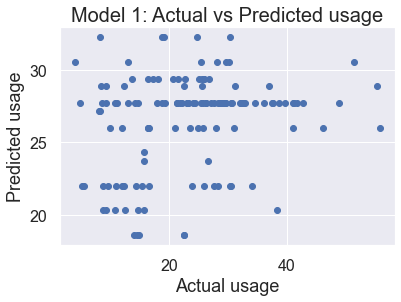

In [24]:
# Scattering the result, and we won't be using this model 
# since it doesn't predicts current result much 
plt.figure(figsize=(6,4))
plt.scatter(y_test, pred)
plt.xlabel("Actual usage", fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel("Predicted usage", fontsize=18)
plt.yticks(fontsize=16)
plt.title("Model 1: Actual vs Predicted usage", fontsize=20)

<AxesSubplot:xlabel='EnforceBansTobaccoAd', ylabel='Value'>

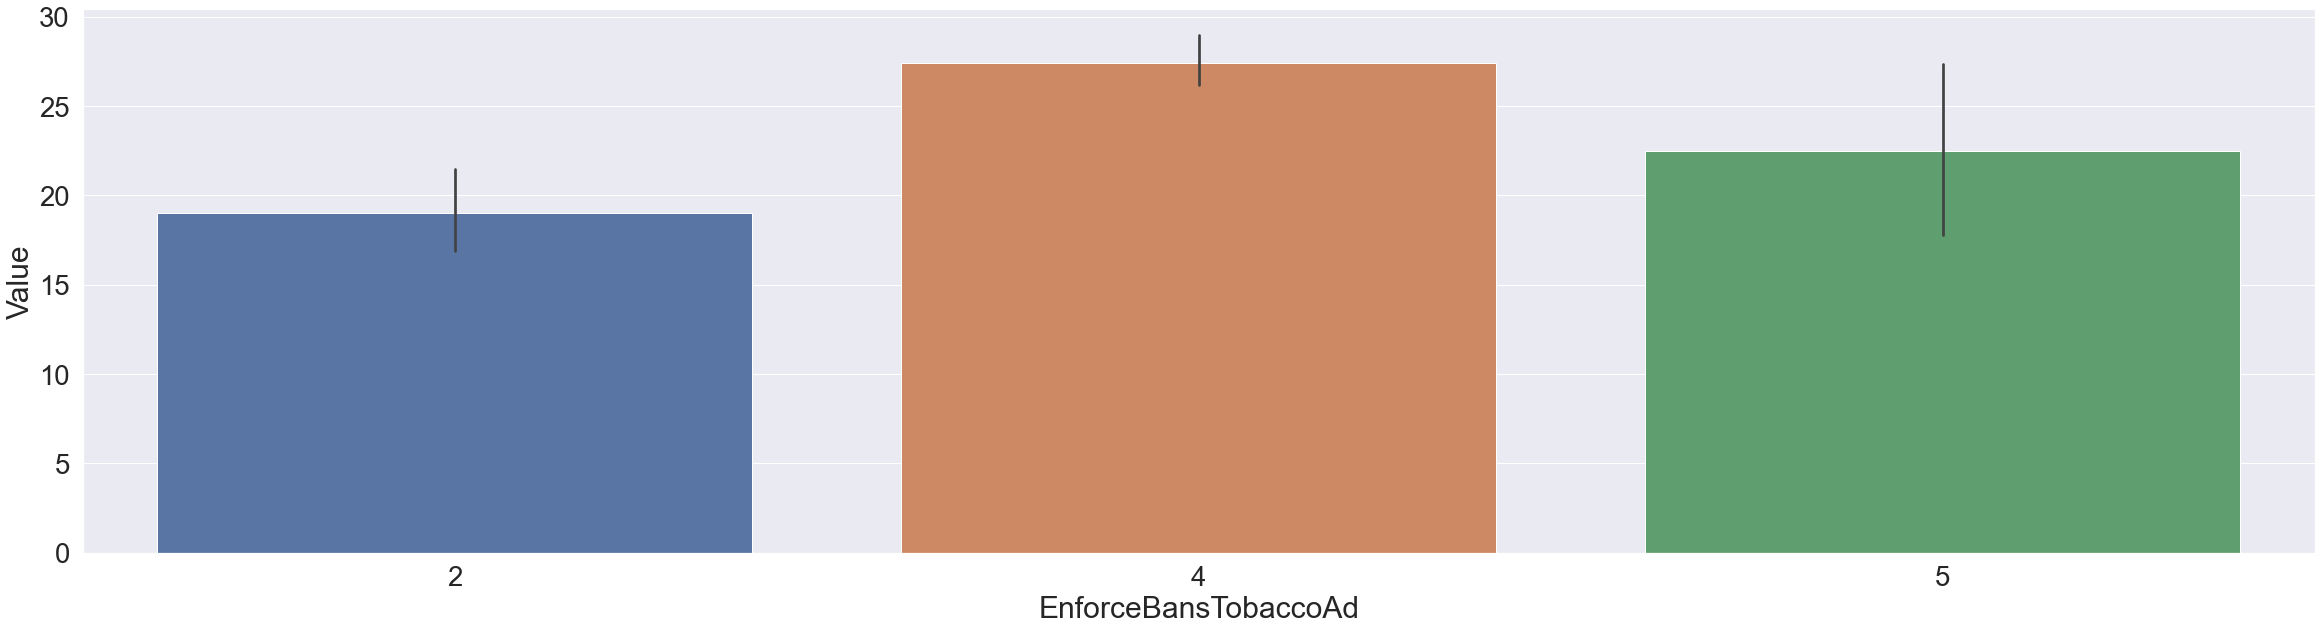

In [25]:
# Why this is happening?
# It seems that we were not able to see the positive trend of strong MPOWER vs low usage percentage
plt.figure(figsize=(40,10))
sns.barplot(model_1_df['EnforceBansTobaccoAd'], model_1_df['Value'])

<AxesSubplot:xlabel='HelpToQuit', ylabel='Value'>

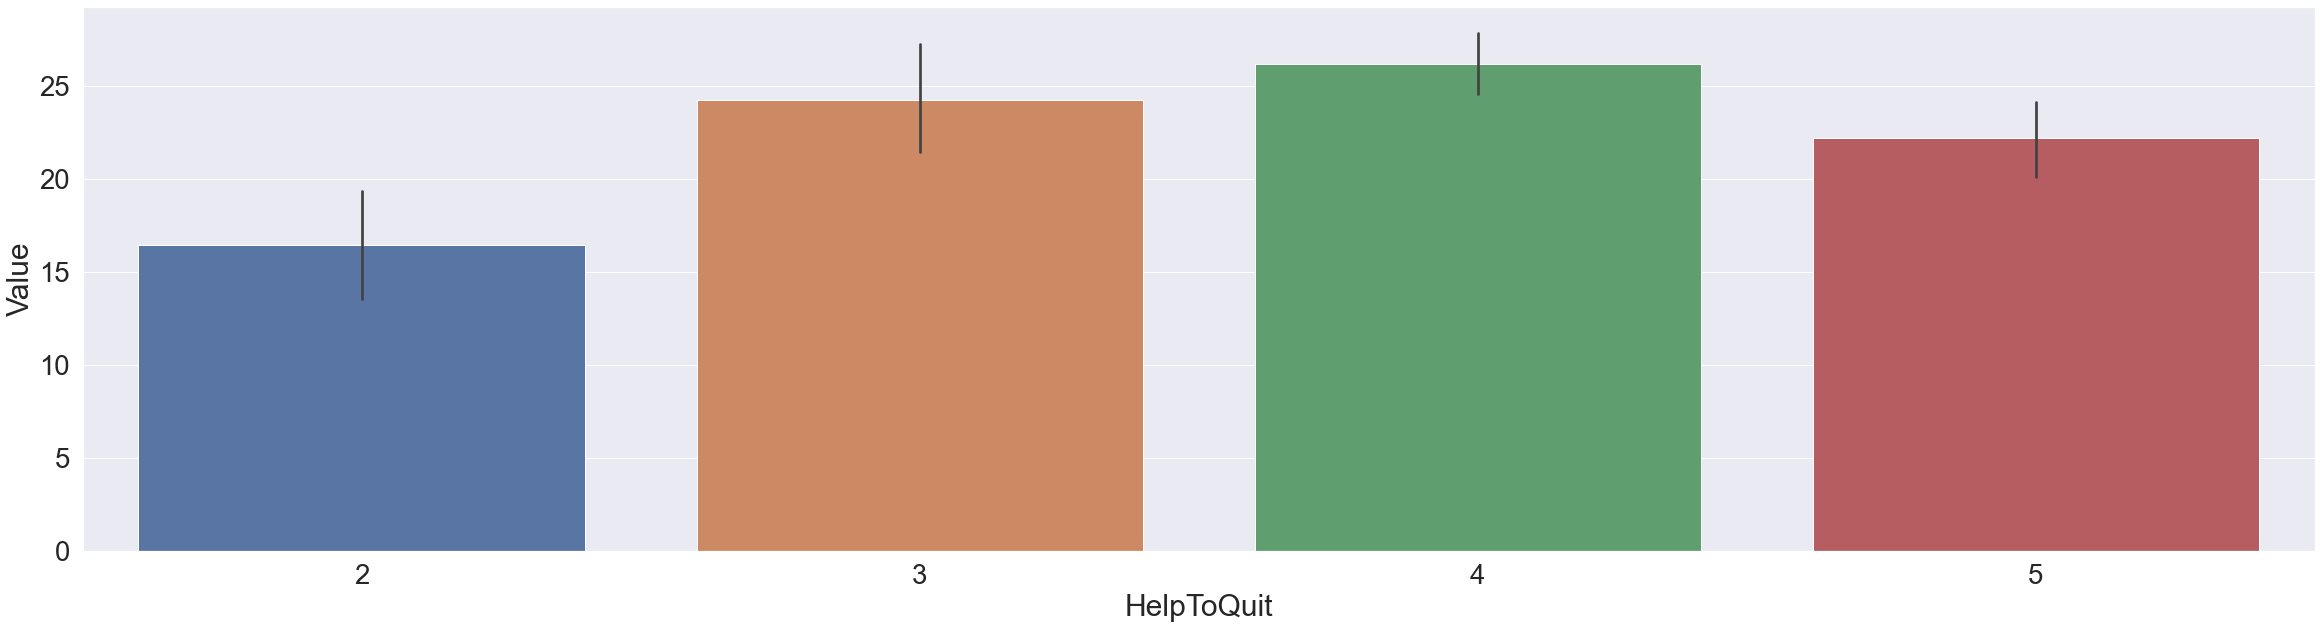

In [26]:
plt.figure(figsize=(40,10))
sns.barplot(model_1_df['HelpToQuit'], model_1_df['Value'])

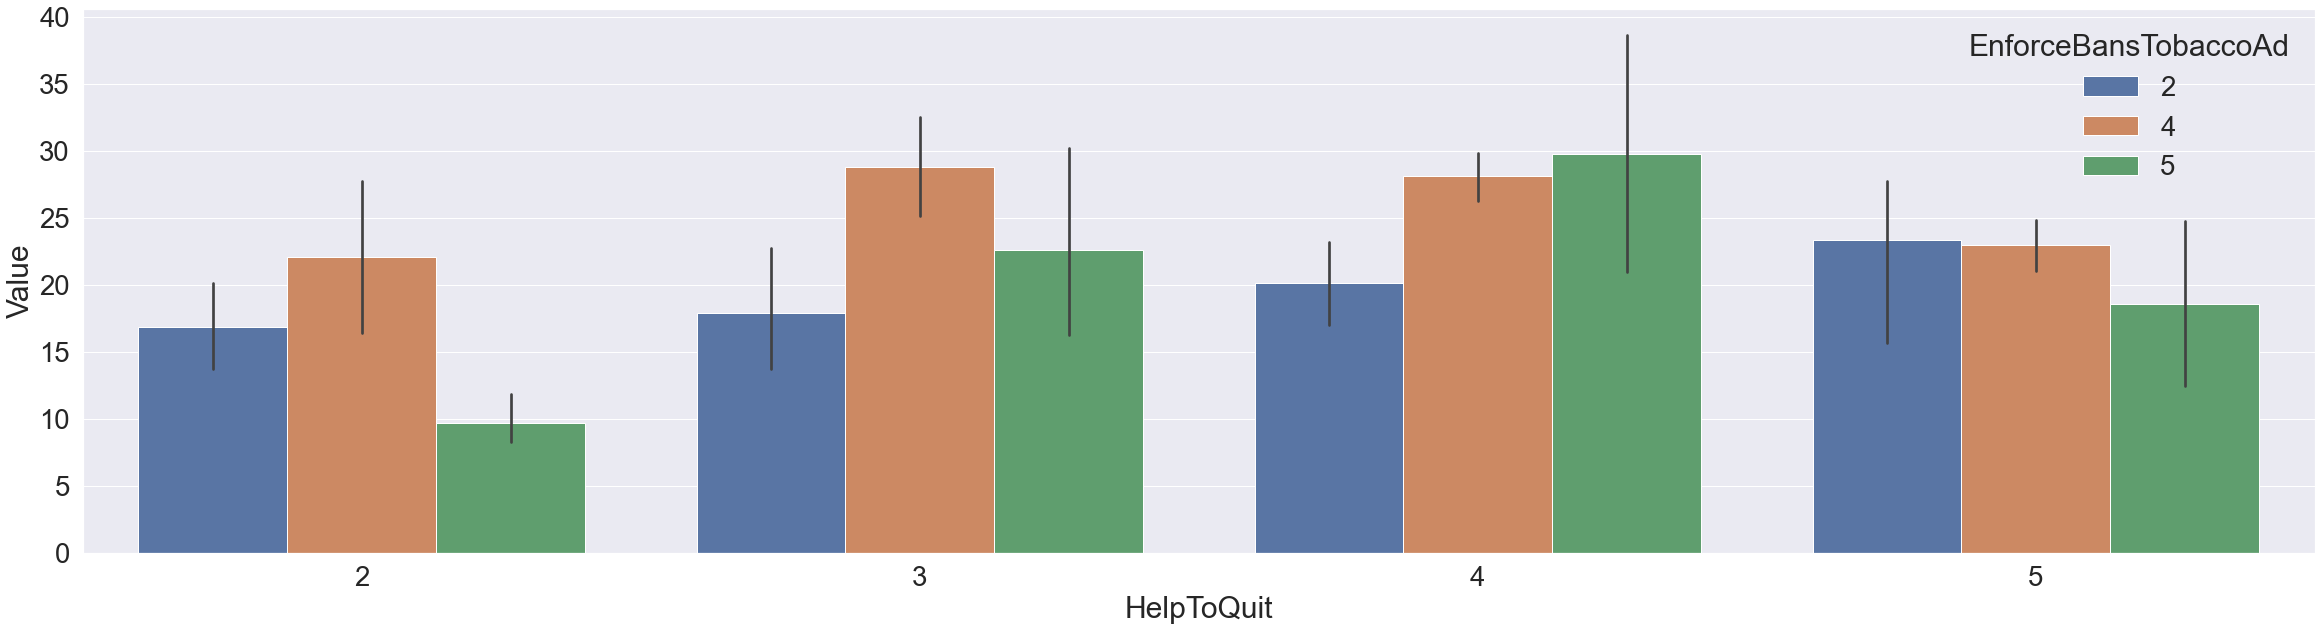

In [27]:
plt.figure(figsize=(40,10))
sns.barplot(model_1_df['HelpToQuit'], model_1_df['Value'], hue=model_1_df['EnforceBansTobaccoAd'])
plt.show()

In [28]:
# When I drilled down of countries & region that are doing less on MPOWER, their tobacco usage rate was below avg
# Region was Africa so maybe we consider adding parent location as another indicator 
model_1_df[model_1_df['EnforceBansTobaccoAd'] == 2][model_1_df['HelpToQuit'] == 2]

,Entity,Code,Year,EnforceBansTobaccoAd,HelpToQuit,ParentLocationCode,ParentLocation,SpatialDimValueCode,Gender,Value
39,Burundi,BDI,2014,2,2,AFR,Africa,BDI,Both sexes,14.0
61,Comoros,COM,2014,2,2,AFR,Africa,COM,Both sexes,22.6
210,Rwanda,RWA,2014,2,2,AFR,Africa,RWA,Both sexes,14.5
220,Sierra Leone,SLE,2014,2,2,AFR,Africa,SLE,Both sexes,22.5
363,Burundi,BDI,2010,2,2,AFR,Africa,BDI,Both sexes,15.5
576,Malawi,MWI,2010,2,2,AFR,Africa,MWI,Both sexes,17.4
579,Malawi,MWI,2014,2,2,AFR,Africa,MWI,Both sexes,14.9
699,Rwanda,RWA,2010,2,2,AFR,Africa,RWA,Both sexes,15.9
709,Sao Tome and Principe,STP,2010,2,2,AFR,Africa,STP,Both sexes,5.7
733,Sierra Leone,SLE,2010,2,2,AFR,Africa,SLE,Both sexes,25.7


In [29]:
model_1_df[model_1_df['EnforceBansTobaccoAd'] == 2][model_1_df['HelpToQuit'] == 2]['Value'].mean()

16.869999999999997

In [30]:
print('total mean value:', model_1_df['Value'].mean())
print()
print('total median value:', model_1_df['Value'].median())

total mean value: 24.504014598540138

total median value: 25.0


## ==============

## Model 2: Use usage * actual population number as the y predictor instead. If better, keep. Else, revert and continue iterating

In [31]:
# Now I will use dataset from WHO
# This dataset includes: 
# 1) Current Health Expenditure (CHE) as % Gross Domestic Product (GDP)
# 2) Current Health Expenditure (CHE) per Capita in US$
# 3) General Government Expenditure (GGE) as % Gross Domestic Product (GDP)
# 4) Gross Domestic Product (GDP) per Capita in US$
# 5) Gross Domestic Product 
# 6) Population (in thousands)

# Sources: https://apps.who.int/nha/database/Select/Indicators/en

add_df = pd.read_excel('./NHA_indicators.xlsx')
add_df.head(6)

,Countries,Indicators,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Algeria,Current Health Expenditure (CHE) as % Gross Do...,3.489033,3.837877,3.730042,3.601041,3.544073,3.235161,3.355103,3.821418,...,5.359398,5.11717,5.267481,6.00051,6.035763,6.547214,6.978492,6.607782,6.380329,6.218427
1,Algeria,Current Health Expenditure (CHE) per Capita in...,61.58218,66.802116,66.463356,75.743355,92.506523,100.713829,116.714317,150.965637,...,208.119919,229.289459,287.386108,335.561951,331.941681,359.64212,291.553558,260.772552,258.039551,255.869431
2,Algeria,General Government Expenditure (GGE) as % Gros...,28.570923,31.2514,34.285088,32.20216,30.764973,27.10796,28.853434,33.236469,...,42.599552,37.25069,40.123169,43.543167,36.185532,40.605556,45.811493,41.665207,39.204933,38.137573
3,Algeria,Gross Domestic Product (GDP) per Capita in US$,1765.021594,1740.600812,1781.839601,2103.373725,2610.175463,3113.100833,3478.709846,3950.513652,...,3883.2702,4480.786643,5455.854766,5592.22393,5499.581303,5493.055565,4177.88749,3946.446246,4044.298711,4114.697215
4,Algeria,Gross Domestic Product,54790.215089,54744.53082,56760.694698,67863.580095,85332.281698,103198.4334,117027.284875,134977.089344,...,137211.007137,161207.299811,200019.519432,209059.112197,209754.762354,213810.002958,165979.218652,160033.888728,167390.243731,173757.112805
5,Algeria,Population (in thousands),31042.235,31451.514,31855.109,32264.157,32692.163,33149.724,33641.002,34166.972,...,35333.881,35977.455,36661.445,37383.895,38140.133,38923.692,39728.025,40551.392,41389.189,42228.408


In [32]:
add_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Countries   1152 non-null   object
 1   Indicators  1152 non-null   object
 2   2000        1152 non-null   object
 3   2001        1152 non-null   object
 4   2002        1152 non-null   object
 5   2003        1152 non-null   object
 6   2004        1152 non-null   object
 7   2005        1152 non-null   object
 8   2006        1152 non-null   object
 9   2007        1152 non-null   object
 10  2008        1152 non-null   object
 11  2009        1152 non-null   object
 12  2010        1152 non-null   object
 13  2011        1152 non-null   object
 14  2012        1152 non-null   object
 15  2013        1152 non-null   object
 16  2014        1152 non-null   object
 17  2015        1152 non-null   object
 18  2016        1152 non-null   object
 19  2017        1152 non-null   object
 20  2018    

In [33]:
population_2010 = add_df[add_df['Indicators'] == 'Population (in thousands)'][['Countries', '2010']]
population_2014 = add_df[add_df['Indicators'] == 'Population (in thousands)'][['Countries', '2014']]

In [34]:
population_2010['Year'] = 2010
population_2014['Year'] = 2014

In [35]:
population_2010.rename(columns = {'Countries' : 'Entity', '2010': 'population'}, inplace=True)
population_2014.rename(columns = {'Countries': 'Entity', '2014': 'population'}, inplace=True)

In [36]:
population = pd.concat([population_2010, population_2014])
population

,Entity,population,Year
5,Algeria,35977.455,2010
11,Angola,23356.246,2010
17,Benin,9199.259,2010
23,Botswana,1987.105,2010
29,Burkina Faso,15605.217,2010
...,...,...,...
1127,Solomon Islands,587.079,2014
1133,Tonga,101.028,2014
1139,Tuvalu,10.972,2014
1145,Vanuatu,263.888,2014


In [37]:
model_1_df.head(3)

,Entity,Code,Year,EnforceBansTobaccoAd,HelpToQuit,ParentLocationCode,ParentLocation,SpatialDimValueCode,Gender,Value
1,Algeria,DZA,2014,4,4,AFR,Africa,DZA,Both sexes,19.4
4,Argentina,ARG,2014,4,5,AMR,Americas,ARG,Both sexes,25.6
7,Armenia,ARM,2014,2,4,EUR,Europe,ARM,Both sexes,28.3


In [38]:
model_1_df[model_1_df['EnforceBansTobaccoAd'] == 2][model_1_df['HelpToQuit'] == 2]

,Entity,Code,Year,EnforceBansTobaccoAd,HelpToQuit,ParentLocationCode,ParentLocation,SpatialDimValueCode,Gender,Value
39,Burundi,BDI,2014,2,2,AFR,Africa,BDI,Both sexes,14.0
61,Comoros,COM,2014,2,2,AFR,Africa,COM,Both sexes,22.6
210,Rwanda,RWA,2014,2,2,AFR,Africa,RWA,Both sexes,14.5
220,Sierra Leone,SLE,2014,2,2,AFR,Africa,SLE,Both sexes,22.5
363,Burundi,BDI,2010,2,2,AFR,Africa,BDI,Both sexes,15.5
576,Malawi,MWI,2010,2,2,AFR,Africa,MWI,Both sexes,17.4
579,Malawi,MWI,2014,2,2,AFR,Africa,MWI,Both sexes,14.9
699,Rwanda,RWA,2010,2,2,AFR,Africa,RWA,Both sexes,15.9
709,Sao Tome and Principe,STP,2010,2,2,AFR,Africa,STP,Both sexes,5.7
733,Sierra Leone,SLE,2010,2,2,AFR,Africa,SLE,Both sexes,25.7


In [39]:
test = model_1_df[model_1_df['EnforceBansTobaccoAd'] == 2][model_1_df['HelpToQuit'] == 2]
test

,Entity,Code,Year,EnforceBansTobaccoAd,HelpToQuit,ParentLocationCode,ParentLocation,SpatialDimValueCode,Gender,Value
39,Burundi,BDI,2014,2,2,AFR,Africa,BDI,Both sexes,14.0
61,Comoros,COM,2014,2,2,AFR,Africa,COM,Both sexes,22.6
210,Rwanda,RWA,2014,2,2,AFR,Africa,RWA,Both sexes,14.5
220,Sierra Leone,SLE,2014,2,2,AFR,Africa,SLE,Both sexes,22.5
363,Burundi,BDI,2010,2,2,AFR,Africa,BDI,Both sexes,15.5
576,Malawi,MWI,2010,2,2,AFR,Africa,MWI,Both sexes,17.4
579,Malawi,MWI,2014,2,2,AFR,Africa,MWI,Both sexes,14.9
699,Rwanda,RWA,2010,2,2,AFR,Africa,RWA,Both sexes,15.9
709,Sao Tome and Principe,STP,2010,2,2,AFR,Africa,STP,Both sexes,5.7
733,Sierra Leone,SLE,2010,2,2,AFR,Africa,SLE,Both sexes,25.7


In [40]:
test['mean_value'] = round(model_1_df['Value'].mean(),1)

In [41]:
test[['Entity', 'Year', 'EnforceBansTobaccoAd', 'HelpToQuit', 'ParentLocation', 'Value', 'mean_value']]

,Entity,Year,EnforceBansTobaccoAd,HelpToQuit,ParentLocation,Value,mean_value
39,Burundi,2014,2,2,Africa,14.0,24.5
61,Comoros,2014,2,2,Africa,22.6,24.5
210,Rwanda,2014,2,2,Africa,14.5,24.5
220,Sierra Leone,2014,2,2,Africa,22.5,24.5
363,Burundi,2010,2,2,Africa,15.5,24.5
576,Malawi,2010,2,2,Africa,17.4,24.5
579,Malawi,2014,2,2,Africa,14.9,24.5
699,Rwanda,2010,2,2,Africa,15.9,24.5
709,Sao Tome and Principe,2010,2,2,Africa,5.7,24.5
733,Sierra Leone,2010,2,2,Africa,25.7,24.5


In [42]:
model_1_df['Value'].mean()

24.504014598540138

In [43]:
model_2_df = model_1_df.merge(population, on = ['Entity', 'Year'])
model_2_df

,Entity,Code,Year,EnforceBansTobaccoAd,HelpToQuit,ParentLocationCode,ParentLocation,SpatialDimValueCode,Gender,Value,population
0,Algeria,DZA,2014,4,4,AFR,Africa,DZA,Both sexes,19.4,38923.692
1,Argentina,ARG,2014,4,5,AMR,Americas,ARG,Both sexes,25.6,42637.511
2,Armenia,ARM,2014,2,4,EUR,Europe,ARM,Both sexes,28.3,2912.409
3,Australia,AUS,2014,4,5,WPR,Western Pacific,AUS,Both sexes,18.2,23596.424
4,Austria,AUT,2014,4,4,EUR,Europe,AUT,Both sexes,32.5,8507.786
...,...,...,...,...,...,...,...,...,...,...,...
267,Vanuatu,VUT,2010,5,3,WPR,Western Pacific,VUT,Both sexes,27.2,236.211
268,Vanuatu,VUT,2014,5,3,WPR,Western Pacific,VUT,Both sexes,25.6,263.888
269,Yemen,YEM,2010,4,3,EMR,Eastern Mediterranean,YEM,Both sexes,24.5,23154.855
270,Zambia,ZMB,2010,2,3,AFR,Africa,ZMB,Both sexes,16.7,13605.984


In [44]:
model_2_df['usage_by_population'] = model_2_df['Value'] * model_2_df['population'] / 100

In [45]:
model_2_df.head(3)

,Entity,Code,Year,EnforceBansTobaccoAd,HelpToQuit,ParentLocationCode,ParentLocation,SpatialDimValueCode,Gender,Value,population,usage_by_population
0,Algeria,DZA,2014,4,4,AFR,Africa,DZA,Both sexes,19.4,38923.692,7551.196248
1,Argentina,ARG,2014,4,5,AMR,Americas,ARG,Both sexes,25.6,42637.511,10915.202816
2,Armenia,ARM,2014,2,4,EUR,Europe,ARM,Both sexes,28.3,2912.409,824.211747


In [46]:
# Since population is a number, we need to normalize to compare its values
model_2_df['norm_usage_ppl'] = model_2_df['usage_by_population'].apply(lambda x: np.log1p(x))

In [47]:
model_2_df.head(3)

,Entity,Code,Year,EnforceBansTobaccoAd,HelpToQuit,ParentLocationCode,ParentLocation,SpatialDimValueCode,Gender,Value,population,usage_by_population,norm_usage_ppl
0,Algeria,DZA,2014,4,4,AFR,Africa,DZA,Both sexes,19.4,38923.692,7551.196248,8.929594
1,Argentina,ARG,2014,4,5,AMR,Americas,ARG,Both sexes,25.6,42637.511,10915.202816,9.298003
2,Armenia,ARM,2014,2,4,EUR,Europe,ARM,Both sexes,28.3,2912.409,824.211747,6.715640


In [48]:
# now changing target value from percentage to number of people

X_train = model_2_df[model_2_df['Year'] == 2010][['EnforceBansTobaccoAd', 'HelpToQuit']]
y_train = model_2_df[model_2_df['Year'] == 2010]['norm_usage_ppl']

X_test = model_2_df[model_2_df['Year'] == 2014][['EnforceBansTobaccoAd', 'HelpToQuit']]
y_test = model_2_df[model_2_df['Year'] == 2014]['norm_usage_ppl']

In [49]:
model_2_reg = LinearRegression()
model_2_reg.fit(X_train, y_train)
pred = model_2_reg.predict(X_test)

In [50]:
model_2_reg.coef_

array([0.11335213, 0.27541259])

In [51]:
model_2_reg.intercept_

5.974620541309493

In [52]:
# Scoring the model
# R^2 is too low as well
r_sq = model_2_reg.score(X_test, y_test)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.003828460784792709


In [53]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test,pred))

2.090783978994109

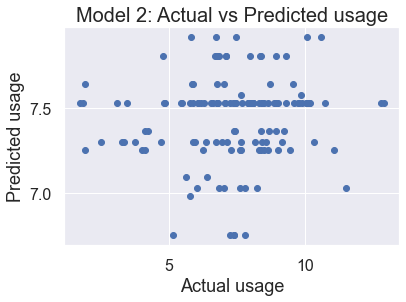

In [54]:
# Scattering the result, and we won't be using this model 
# since it doesn't predicts current result much 
plt.figure(figsize=(6,4))
plt.scatter(y_test, pred)
plt.xlabel("Actual usage", fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel("Predicted usage", fontsize=18)
plt.yticks(fontsize=16)
plt.title("Model 2: Actual vs Predicted usage", fontsize=20)
plt.show()

<AxesSubplot:xlabel='EnforceBansTobaccoAd', ylabel='norm_usage_ppl'>

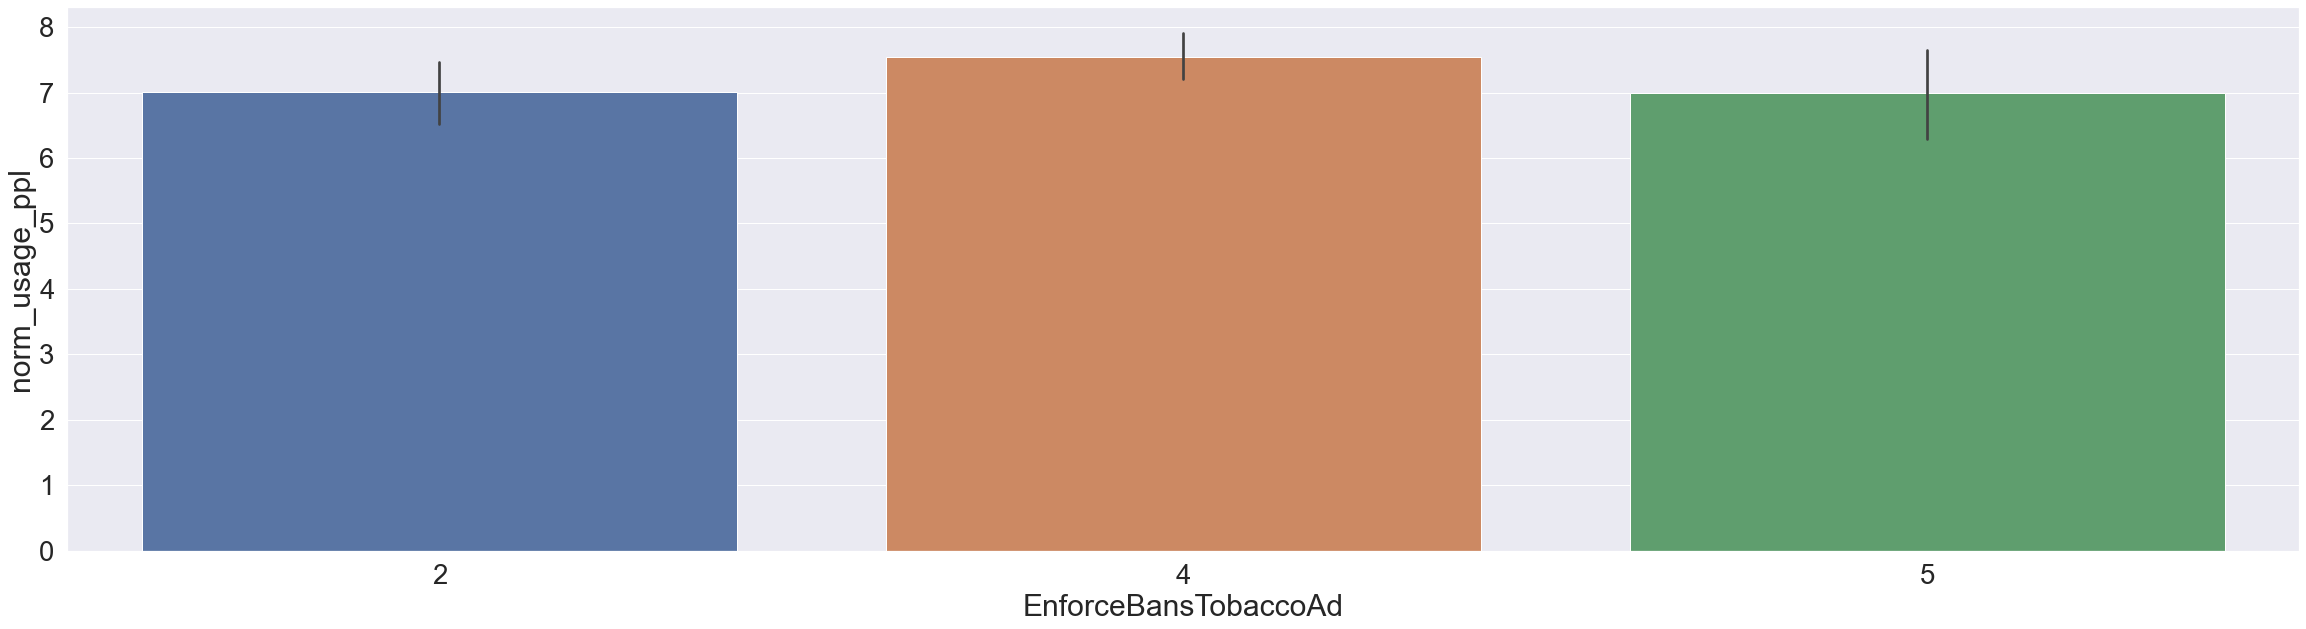

In [55]:
# Why this is happening?
# It seems that we were not able to see the positive trend of strong MPOWER vs low usage percentage
plt.figure(figsize=(40,10))
sns.barplot(model_2_df['EnforceBansTobaccoAd'], model_2_df['norm_usage_ppl'])

<AxesSubplot:xlabel='HelpToQuit', ylabel='norm_usage_ppl'>

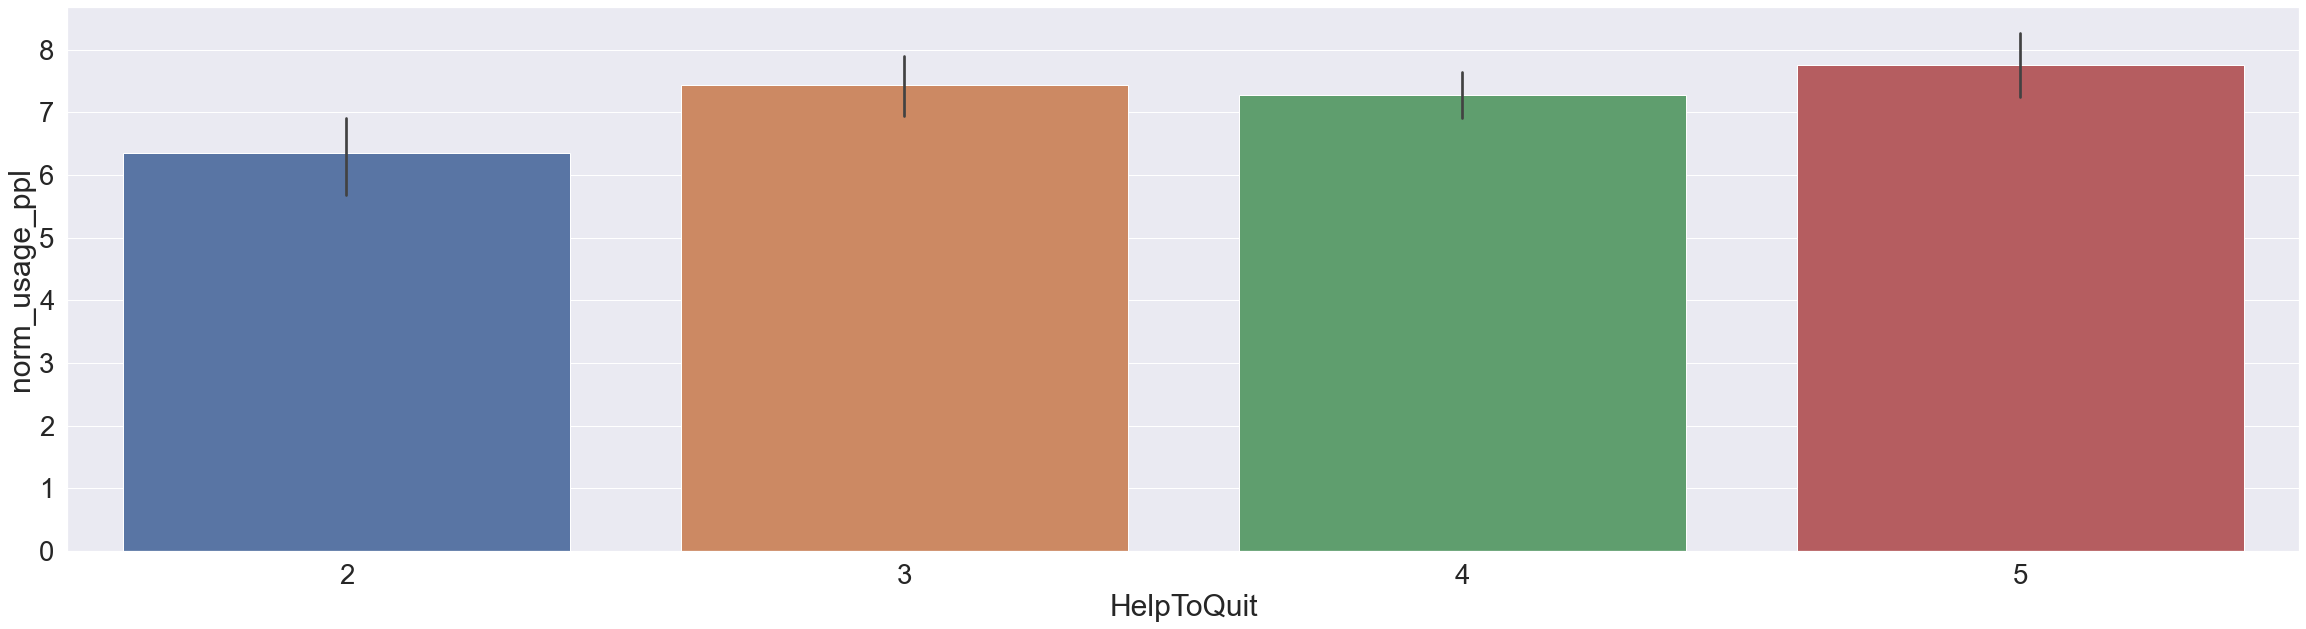

In [56]:
# Why this is happening?
# It seems that we were not able to see the positive trend of strong MPOWER vs low usage percentage
plt.figure(figsize=(40,10))
sns.barplot(model_2_df['HelpToQuit'], model_2_df['norm_usage_ppl'])

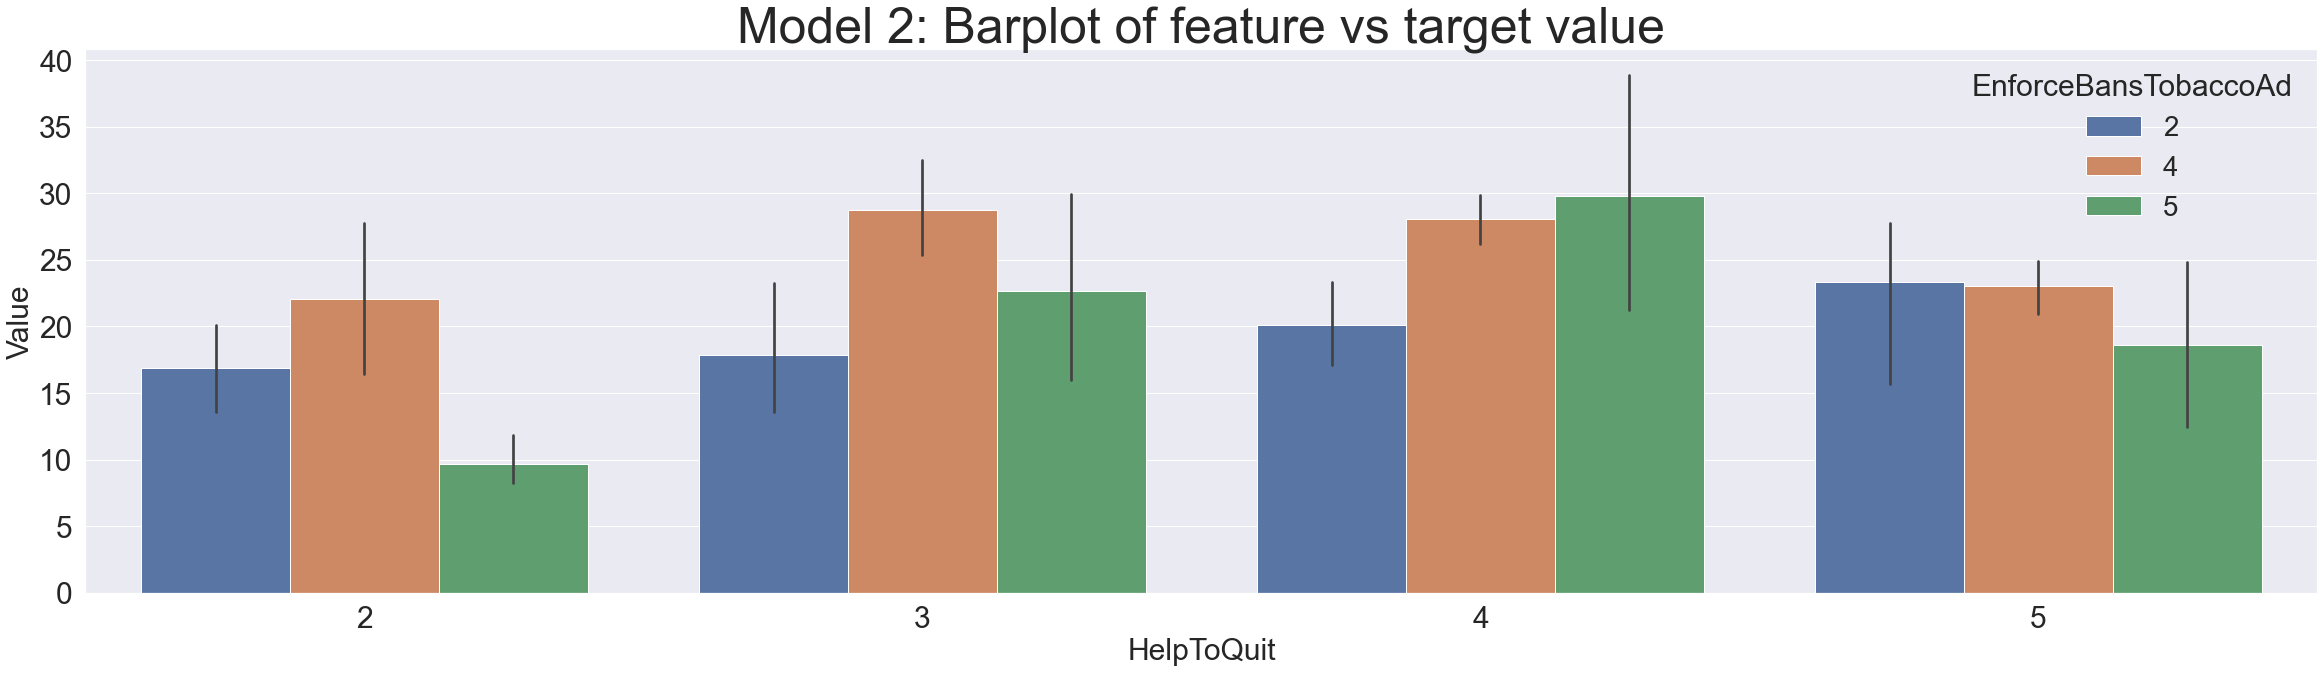

In [57]:
plt.figure(figsize=(40,10))
plt.xlabel("Help to Quit", fontsize=30)
plt.xticks(fontsize=30)
plt.ylabel("Population", fontsize=30)
plt.yticks(fontsize=30)
plt.title("Model 2: Barplot of feature vs target value", fontsize=50)
sns.barplot(model_2_df['HelpToQuit'], model_2_df['Value'], hue=model_2_df['EnforceBansTobaccoAd'])
plt.show()

In [58]:
# When I drilled down of countries & region that are doing less on MPOWER, their tobacco usage rate was below avg
# Region was Africa so maybe we consider adding parent location as another indicator 
model_2_df[model_2_df['EnforceBansTobaccoAd'] == 2][model_2_df['HelpToQuit'] == 2]

,Entity,Code,Year,EnforceBansTobaccoAd,HelpToQuit,ParentLocationCode,ParentLocation,SpatialDimValueCode,Gender,Value,population,usage_by_population,norm_usage_ppl
13,Burundi,BDI,2014,2,2,AFR,Africa,BDI,Both sexes,14.0,9844.299,1378.20186,7.229260
20,Comoros,COM,2014,2,2,AFR,Africa,COM,Both sexes,22.6,759.39,171.62214,5.151105
69,Rwanda,RWA,2014,2,2,AFR,Africa,RWA,Both sexes,14.5,11083.63,1607.12635,7.382825
72,Sierra Leone,SLE,2014,2,2,AFR,Africa,SLE,Both sexes,22.5,7017.148,1578.8583,7.365090
120,Burundi,BDI,2010,2,2,AFR,Africa,BDI,Both sexes,15.5,8675.602,1344.71831,7.204683
190,Malawi,MWI,2010,2,2,AFR,Africa,MWI,Both sexes,17.4,14539.612,2529.892488,7.836327
191,Malawi,MWI,2014,2,2,AFR,Africa,MWI,Both sexes,14.9,16289.552,2427.143248,7.794882
231,Rwanda,RWA,2010,2,2,AFR,Africa,RWA,Both sexes,15.9,10039.338,1596.254742,7.376042
234,Sao Tome and Principe,STP,2010,2,2,AFR,Africa,STP,Both sexes,5.7,180.371,10.281147,2.423133
242,Sierra Leone,SLE,2010,2,2,AFR,Africa,SLE,Both sexes,25.7,6415.634,1648.817938,7.408420


## - Model 3+: Adding various datasets (additional data)

In [59]:
model_3_df = model_2_df[['Entity', 'Year', 'EnforceBansTobaccoAd', 'HelpToQuit', 'ParentLocation', 'Value']]

In [60]:
# As mentioned in previous analysis, I will add Parent Location as additional features and conduct linear regression
model_3_df['ParentLocation'].value_counts()

Europe                   86
Africa                   70
Western Pacific          38
Americas                 38
Eastern Mediterranean    26
South-East Asia          14
Name: ParentLocation, dtype: int64

In [61]:
# Use one-hot encoding, since it is a categorical data and doesn't have inequality.
model_3_df = pd.get_dummies(model_3_df, columns=['ParentLocation'], prefix=['Region'])

In [62]:
model_3_df

,Entity,Year,EnforceBansTobaccoAd,HelpToQuit,Value,Region_Africa,Region_Americas,Region_Eastern Mediterranean,Region_Europe,Region_South-East Asia,Region_Western Pacific
0,Algeria,2014,4,4,19.4,1,0,0,0,0,0
1,Argentina,2014,4,5,25.6,0,1,0,0,0,0
2,Armenia,2014,2,4,28.3,0,0,0,1,0,0
3,Australia,2014,4,5,18.2,0,0,0,0,0,1
4,Austria,2014,4,4,32.5,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
267,Vanuatu,2010,5,3,27.2,0,0,0,0,0,1
268,Vanuatu,2014,5,3,25.6,0,0,0,0,0,1
269,Yemen,2010,4,3,24.5,0,0,1,0,0,0
270,Zambia,2010,2,3,16.7,1,0,0,0,0,0


In [63]:
# now changing target value from percentage to number of people

X_train = model_3_df[model_3_df['Year'] == 2010][['EnforceBansTobaccoAd', 'HelpToQuit', 'Region_Africa', 'Region_Americas', 'Region_Eastern Mediterranean', 'Region_Europe', 'Region_South-East Asia', 'Region_Western Pacific']]
y_train = model_3_df[model_3_df['Year'] == 2010]['Value']

X_test = model_3_df[model_3_df['Year'] == 2014][['EnforceBansTobaccoAd', 'HelpToQuit', 'Region_Africa', 'Region_Americas', 'Region_Eastern Mediterranean', 'Region_Europe', 'Region_South-East Asia', 'Region_Western Pacific']]
y_test = model_3_df[model_3_df['Year'] == 2014]['Value']

In [64]:
model_3_reg = LinearRegression()
model_3_reg.fit(X_train, y_train)
pred = model_3_reg.predict(X_test)

In [65]:
model_3_reg.coef_

array([  1.38760677,  -1.01285226, -10.65904784,  -6.1755797 ,
        -3.37595467,   4.01240523,  10.49103724,   5.70713973])

In [66]:
model_3_reg.intercept_

25.411509297811385

In [67]:
# Scoring the model
# R^2 is 0.4
r_sq = model_3_reg.score(X_test, y_test)
print('coefficient of determination:', round(r_sq,4))

coefficient of determination: 0.4039


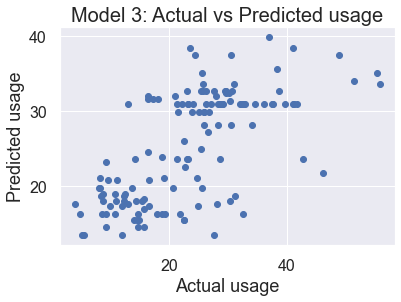

In [68]:
# Scattering the result: got more predicted power 
plt.figure(figsize=(6,4))
plt.scatter(y_test, pred)
plt.xlabel("Actual usage", fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel("Predicted usage", fontsize=18)
plt.yticks(fontsize=16)
plt.title("Model 3: Actual vs Predicted usage", fontsize=20)
plt.show()

<AxesSubplot:>

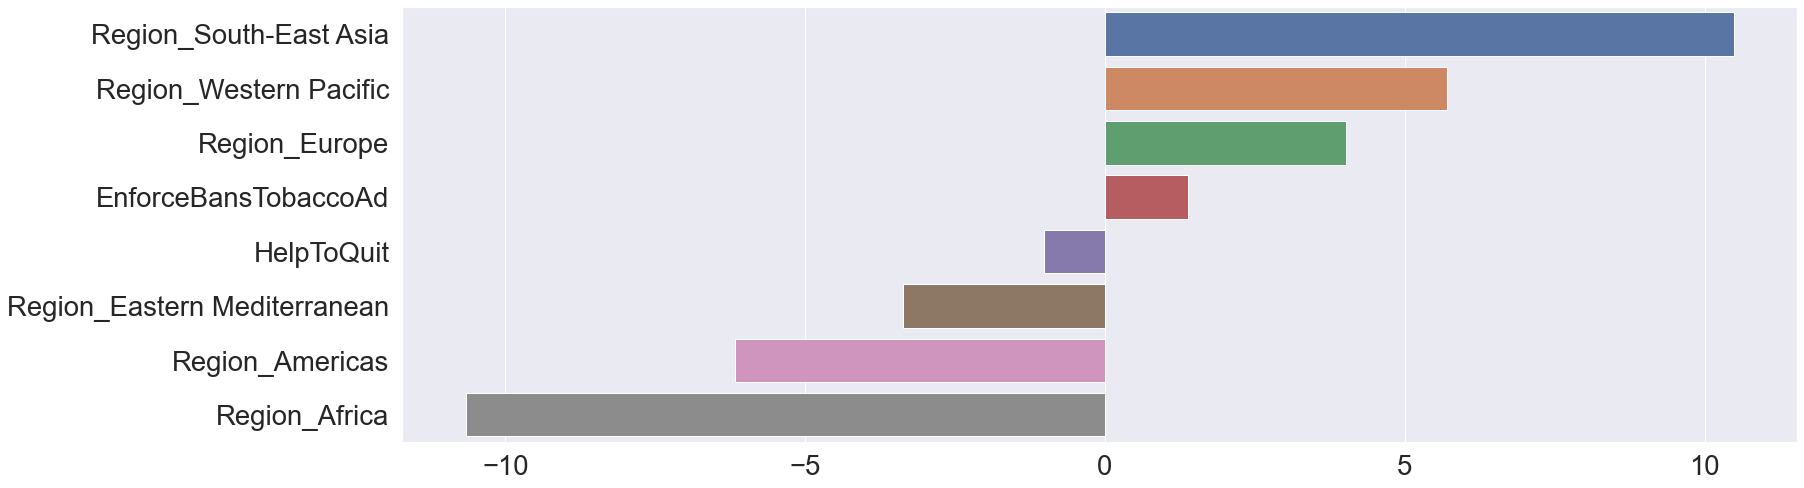

In [69]:
# Visualizing relationships between features and target
plt.figure(figsize=(25,8))
coef = pd.Series(model_3_reg.coef_, index=X_train.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [70]:
## Model4: adding tax

In [71]:
add_df_2 = pd.read_csv('./M_group,P_group,O_group,W_group,W-MM_group,E_group,R_group.csv')
add_df_2.head(3)

,Country,Year,Monitor,Protect from tobacco smoke,Offer help to quit tobacco use,Warn about the dangers of tobacco,Enforce bans on tobacco advertising,Raise taxes on tobacco,Anti-tobacco mass media campaigns
0,Afghanistan,2018,2,5,3,2,5,2,2
1,Afghanistan,2016,2,5,3,4,5,2,2
2,Afghanistan,2014,2,3,3,2,4,2,2


In [72]:
add_df_2.rename(columns={'Country': 'Entity'}, inplace=True)

In [73]:
add_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365 entries, 0 to 1364
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Entity                               1365 non-null   object
 1   Year                                 1365 non-null   int64 
 2   Monitor                              1365 non-null   int64 
 3   Protect from tobacco smoke           1365 non-null   int64 
 4   Offer help to quit tobacco use       1365 non-null   int64 
 5   Warn about the dangers of tobacco    1365 non-null   int64 
 6   Enforce bans on tobacco advertising  1365 non-null   int64 
 7   Raise taxes on tobacco               1365 non-null   object
 8   Anti-tobacco mass media campaigns    1365 non-null   object
dtypes: int64(6), object(3)
memory usage: 96.1+ KB


In [74]:
add_df_2.duplicated().sum()

0

In [75]:
add_df_2['Year'].value_counts()

2007    195
2008    195
2010    195
2012    195
2014    195
2016    195
2018    195
Name: Year, dtype: int64

In [76]:
model_4_df = model_3_df.merge(add_df_2, on = ['Entity', 'Year'])

In [77]:
# adding more values 

column_used = ['EnforceBansTobaccoAd', 'HelpToQuit', 'Value','Region_Africa', 'Region_Americas',\
               'Region_Eastern Mediterranean', 'Region_Europe', 'Region_South-East Asia', \
               'Region_Western Pacific', 'Monitor', 'Protect from tobacco smoke',\
               'Warn about the dangers of tobacco', 'Raise taxes on tobacco',\
               'Anti-tobacco mass media campaigns', 'Year']

column_feature = ['EnforceBansTobaccoAd', 'HelpToQuit', 'Region_Africa', 'Region_Americas',\
                  'Region_Eastern Mediterranean', 'Region_Europe', 'Region_South-East Asia', \
                  'Region_Western Pacific', 'Monitor', 'Protect from tobacco smoke',\
                  'Warn about the dangers of tobacco', 'Raise taxes on tobacco',\
                  'Anti-tobacco mass media campaigns']

In [78]:
# now changing target value from percentage to number of people

X_train = model_4_df[model_4_df['Year'] == 2010][column_feature]
y_train = model_4_df[model_4_df['Year'] == 2010]['Value']

X_test = model_4_df[model_4_df['Year'] == 2014][column_feature]
y_test = model_4_df[model_4_df['Year'] == 2014]['Value']

In [79]:
model_4_reg = LinearRegression()
model_4_reg.fit(X_train, y_train)
pred = model_4_reg.predict(X_test)

In [80]:
model_4_reg.coef_

array([  1.38472764,  -0.92344393, -10.96029148,  -5.88269386,
        -3.42109187,   3.5224563 ,  10.24702998,   6.49459093,
        -0.50151934,   0.56683533,  -1.1265877 ,   1.61641812,
        -0.60353653])

In [81]:
model_4_reg.intercept_

24.5010570270611

In [82]:
# Scoring the model
# R^2 is 0.4
r_sq = model_4_reg.score(X_test, y_test)
print('coefficient of determination:', round(r_sq,4))

coefficient of determination: 0.4653


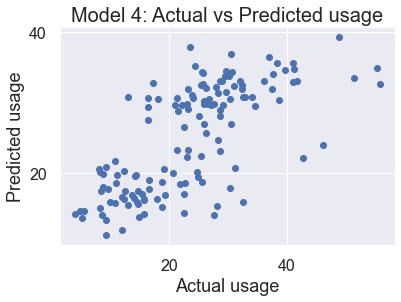

In [83]:
# Scattering the result: got more predicted power 
plt.figure(figsize=(6,4))
plt.scatter(y_test, pred)
plt.xlabel("Actual usage", fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel("Predicted usage", fontsize=18)
plt.yticks(fontsize=16)
plt.title("Model 4: Actual vs Predicted usage", fontsize=20)
plt.show()

<AxesSubplot:>

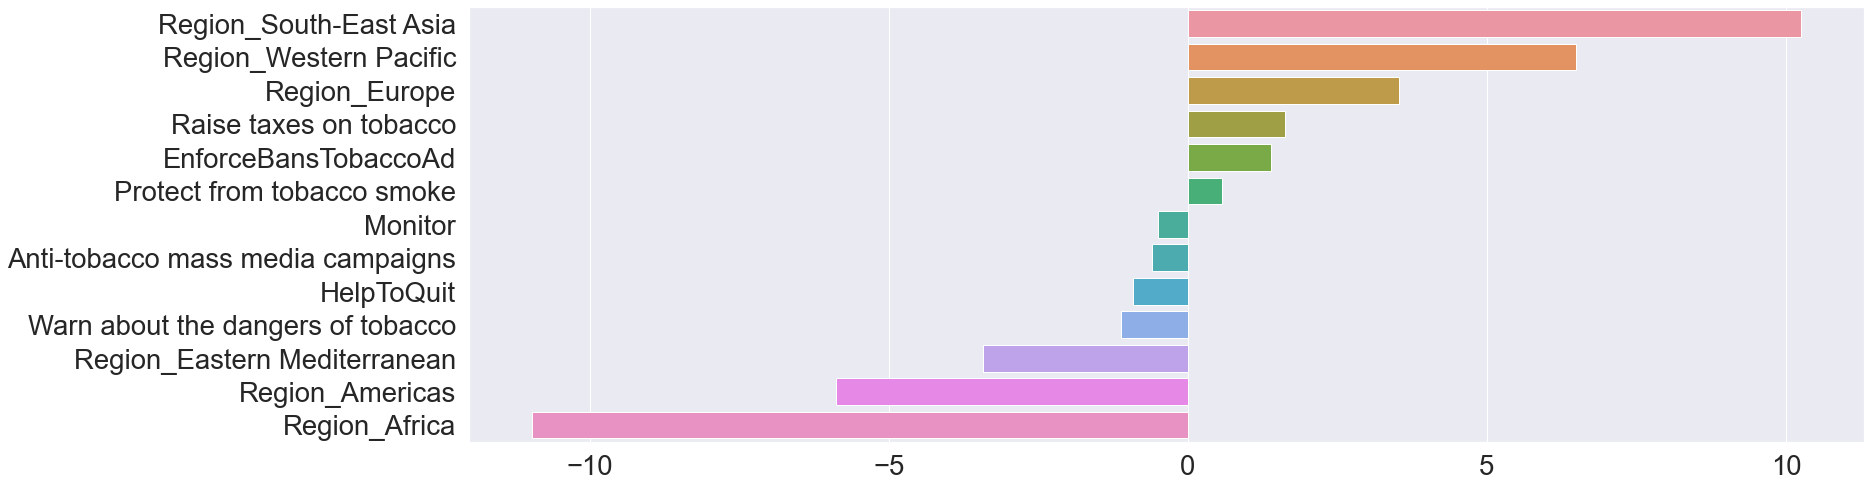

In [84]:
# Visualizing relationships between features and target
plt.figure(figsize=(25,8))
coef = pd.Series(model_4_reg.coef_, index=X_train.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [85]:
add_df['Indicators'].value_counts()

Gross Domestic Product                                                    192
Current Health Expenditure (CHE) per Capita in US$                        192
Gross Domestic Product (GDP) per Capita in US$                            192
General Government Expenditure (GGE) as % Gross Domestic Product (GDP)    192
Population (in thousands)                                                 192
Current Health Expenditure (CHE) as % Gross Domestic Product (GDP)        192
Name: Indicators, dtype: int64

In [86]:
## Model 5

CHE_2010 = add_df[add_df['Indicators'] == 'Current Health Expenditure (CHE) per Capita in US$'][['Countries', '2010']]
CHE_2014 = add_df[add_df['Indicators'] == 'Current Health Expenditure (CHE) per Capita in US$'][['Countries', '2014']]

In [87]:
CHE_2010['Year'] = 2010
CHE_2014['Year'] = 2014

In [88]:
CHE_2010

,Countries,2010,Year
1,Algeria,229.289459,2010
7,Angola,96.697014,2010
13,Benin,31.041548,2010
19,Botswana,398.570709,2010
25,Burkina Faso,33.910816,2010
...,...,...,...
1123,Solomon Islands,133.34993,2010
1129,Tonga,177.968948,2010
1135,Tuvalu,500.055969,2010
1141,Vanuatu,100.135483,2010


In [89]:
CHE_2010.rename(columns = {'Countries' : 'Entity', '2010': 'CHE'}, inplace=True)
CHE_2014.rename(columns = {'Countries': 'Entity', '2014': 'CHE'}, inplace=True)

In [90]:
CHE = pd.concat([CHE_2010, CHE_2014])
CHE

,Entity,CHE,Year
1,Algeria,229.289459,2010
7,Angola,96.697014,2010
13,Benin,31.041548,2010
19,Botswana,398.570709,2010
25,Burkina Faso,33.910816,2010
...,...,...,...
1123,Solomon Islands,114.359657,2014
1129,Tonga,226.127457,2014
1135,Tuvalu,567.964111,2014
1141,Vanuatu,106.726944,2014


In [91]:
## Model 5

GDP_2010 = add_df[add_df['Indicators'] == 'Gross Domestic Product (GDP) per Capita in US$'][['Countries', '2010']]
GDP_2014 = add_df[add_df['Indicators'] == 'Gross Domestic Product (GDP) per Capita in US$'][['Countries', '2014']]

In [92]:
GDP_2010['Year'] = 2010
GDP_2014['Year'] = 2014

In [93]:
GDP_2010.rename(columns = {'Countries' : 'Entity', '2010': 'GDP'}, inplace=True)
GDP_2014.rename(columns = {'Countries': 'Entity', '2014': 'GDP'}, inplace=True)

In [94]:
GDP = pd.concat([GDP_2010, GDP_2014])
GDP

,Entity,GDP,Year
3,Algeria,4480.786643,2010
9,Angola,3587.882694,2010
15,Benin,1036.534055,2010
21,Botswana,6434.761342,2010
27,Burkina Faso,575.446314,2010
...,...,...,...
1125,Solomon Islands,1996.808108,2014
1131,Tonga,4405.714713,2014
1137,Tuvalu,3368.404629,2014
1143,Vanuatu,3088.259483,2014


In [95]:
## Model 5

gen_2010 = add_df[add_df['Indicators'] == 'General Government Expenditure (GGE) as % Gross Domestic Product (GDP)'][['Countries', '2010']]
gen_2014 = add_df[add_df['Indicators'] == 'General Government Expenditure (GGE) as % Gross Domestic Product (GDP)'][['Countries', '2014']]

In [96]:
gen_2010['Year'] = 2010
gen_2014['Year'] = 2014

In [97]:
gen_2010.rename(columns = {'Countries' : 'Entity', '2010': 'gen_exp'}, inplace=True)
gen_2014.rename(columns = {'Countries': 'Entity', '2014': 'gen_exp'}, inplace=True)

In [98]:
gen_exp = pd.concat([gen_2010, gen_2014])
gen_exp

,Entity,gen_exp,Year
2,Algeria,37.25069,2010
8,Angola,39.394489,2010
14,Benin,14.075778,2010
20,Botswana,44.225079,2010
26,Burkina Faso,24.355434,2010
...,...,...,...
1124,Solomon Islands,45.200092,2014
1130,Tonga,34.671532,2014
1136,Tuvalu,109.756104,2014
1142,Vanuatu,26.970383,2014


In [99]:
model_5_df = model_4_df.merge(CHE, on = ['Entity', 'Year'])

In [100]:
model_5_df_2 = model_5_df.merge(GDP, on = ['Entity', 'Year'])

In [101]:
model_5_df_3 = model_5_df_2.merge(gen_exp, on = ['Entity', 'Year'])

In [102]:
# adding more values 

column_used = ['EnforceBansTobaccoAd', 'HelpToQuit', 'Value','Region_Africa', 'Region_Americas',\
               'Region_Eastern Mediterranean', 'Region_Europe', 'Region_South-East Asia', \
               'Region_Western Pacific', 'Monitor', 'Protect from tobacco smoke',\
               'Warn about the dangers of tobacco', 'Raise taxes on tobacco',\
               'Anti-tobacco mass media campaigns', 'Year', 'CHE', 'GDP', 'gen_exp']

column_feature = ['EnforceBansTobaccoAd', 'HelpToQuit', 'Region_Africa', 'Region_Americas',\
                  'Region_Eastern Mediterranean', 'Region_Europe', 'Region_South-East Asia', \
                  'Region_Western Pacific', 'Monitor', 'Protect from tobacco smoke',\
                  'Warn about the dangers of tobacco', 'Raise taxes on tobacco',\
                  'Anti-tobacco mass media campaigns', 'CHE', 'GDP', 'gen_exp']

In [103]:
model_5_df_3.columns

Index(['Entity', 'Year', 'EnforceBansTobaccoAd', 'HelpToQuit', 'Value',
       'Region_Africa', 'Region_Americas', 'Region_Eastern Mediterranean',
       'Region_Europe', 'Region_South-East Asia', 'Region_Western Pacific',
       'Monitor', 'Protect from tobacco smoke',
       'Offer help to quit tobacco use', 'Warn about the dangers of tobacco',
       'Enforce bans on tobacco advertising', 'Raise taxes on tobacco',
       'Anti-tobacco mass media campaigns', 'CHE', 'GDP', 'gen_exp'],
      dtype='object')

In [104]:
# now changing target value from percentage to number of people

X_train = model_5_df_3[model_5_df_3['Year'] == 2010][column_feature]
y_train = model_5_df_3[model_5_df_3['Year'] == 2010]['Value']

X_test = model_5_df_3[model_5_df_3['Year'] == 2014][column_feature]
y_test = model_5_df_3[model_5_df_3['Year'] == 2014]['Value']

In [105]:
X_test

,EnforceBansTobaccoAd,HelpToQuit,Region_Africa,Region_Americas,Region_Eastern Mediterranean,Region_Europe,Region_South-East Asia,Region_Western Pacific,Monitor,Protect from tobacco smoke,Warn about the dangers of tobacco,Raise taxes on tobacco,Anti-tobacco mass media campaigns,CHE,GDP,gen_exp
0,4,4,1,0,0,0,0,0,3,3,2,3,2,359.64212,5493.055565,40.605556
1,4,5,0,1,0,0,0,0,4,5,5,4,4,1286.217651,13299.324458,38.852928
2,2,4,0,0,0,1,0,0,4,3,4,3,4,405.728882,3986.223164,23.990717
3,4,5,0,0,0,0,0,1,4,5,5,4,5,5607.917969,62062.154468,36.60302
4,4,4,0,0,0,1,0,0,4,2,3,4,2,5393.602051,52021.164035,52.430923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,4,4,0,0,0,0,0,1,2,3,5,3,4,114.359657,1996.808108,45.200092
255,5,2,1,0,0,0,0,0,3,3,4,2,4,43.890382,864.772897,20.390014
257,4,4,0,0,0,0,0,1,3,4,4,4,2,226.127457,4405.714713,34.671532
261,5,4,0,0,0,0,0,1,2,3,3,2,2,567.964111,3368.404629,109.756104


In [106]:
model_5_reg = LinearRegression()
model_5_reg.fit(X_train, y_train)
pred = model_5_reg.predict(X_test)

In [107]:
model_5_reg.coef_

array([ 9.42062189e-01, -2.43041260e-01, -1.00973607e+01, -6.25002685e+00,
       -2.50566265e+00,  1.69387126e+00,  1.31282030e+01,  4.03097599e+00,
       -3.20902584e-01,  2.31398265e-01, -3.63785395e-01,  1.43883619e+00,
       -4.91745199e-01,  5.99593613e-04, -1.74248812e-04,  2.62571959e-01])

In [108]:
model_5_reg.intercept_

15.449632158788928

In [109]:
# Scoring the model
# R^2 is 0.56
r_sq = model_5_reg.score(X_test, y_test)
print('coefficient of determination:', round(r_sq,4))

coefficient of determination: 0.5619


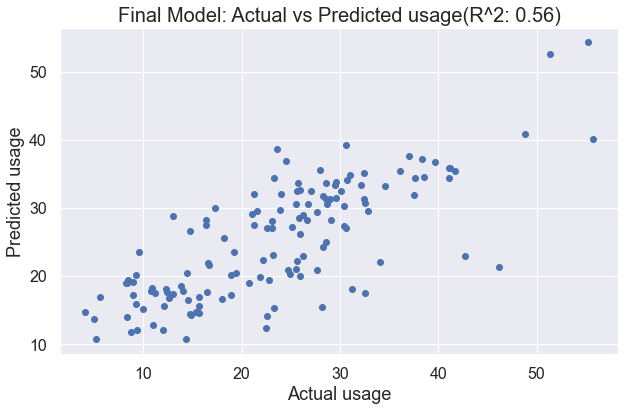

In [110]:
# Scattering the result: got more predicted power 
plt.figure(figsize=(10,6))
plt.scatter(y_test, pred)
plt.xlabel("Actual usage", fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel("Predicted usage", fontsize=18)
plt.yticks(fontsize=16)
plt.title("Final Model: Actual vs Predicted usage(R^2: 0.56)", fontsize=20)
plt.show()

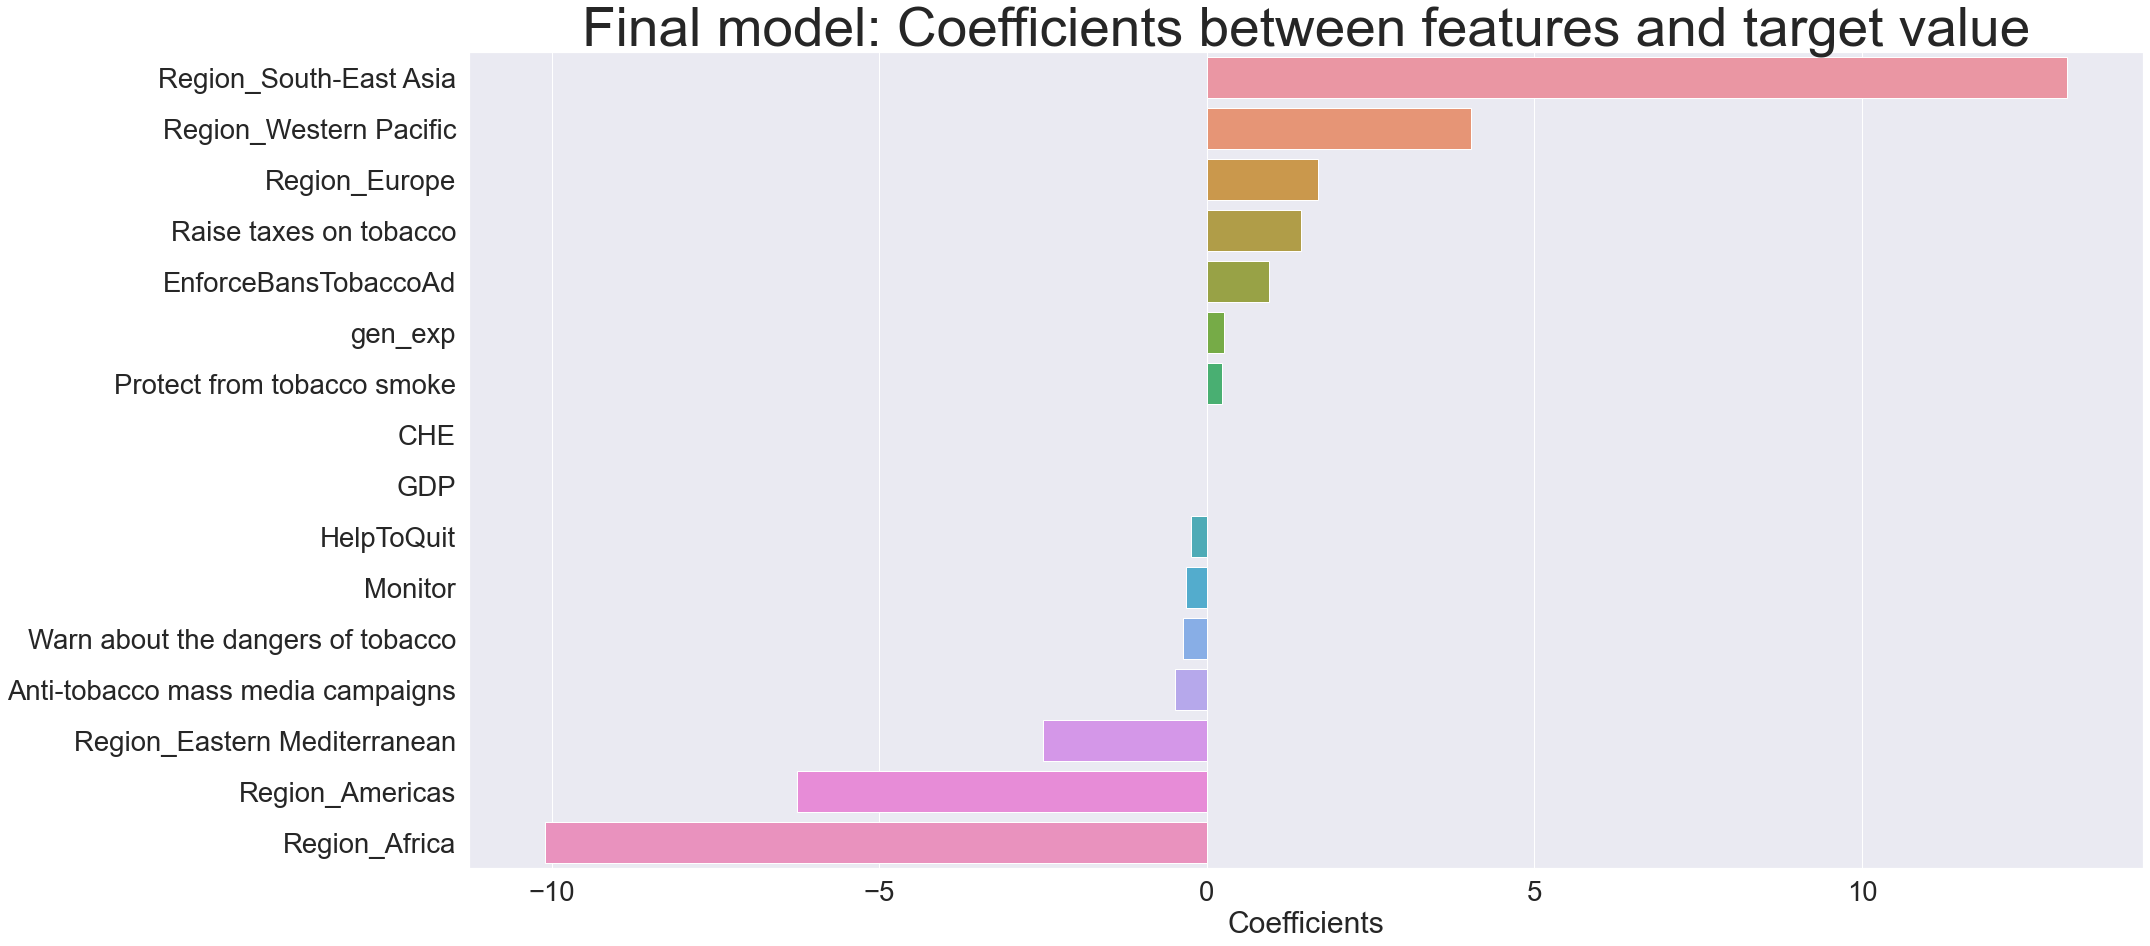

In [111]:
# Visualizing relationships between features and target
plt.figure(figsize=(30,15))
coef = pd.Series(model_5_reg.coef_, index=X_train.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)
plt.xlabel("Coefficients", fontsize=30)
plt.title("Final model: Coefficients between features and target value", fontsize=55)
plt.show()

In [112]:
# Model 6

add_df_3 = pd.read_csv('./gross-enrollment-ratio-in-tertiary-education.csv')
add_df_3.head(3)

,Entity,Code,Year,"Gross enrolment ratio, tertiary, both sexes (%)"
0,Afghanistan,AFG,1970,0.76817
1,Afghanistan,AFG,1971,0.92394
2,Afghanistan,AFG,1972,0.95241


In [113]:
model_6_df = model_5_df_3.merge(add_df_3, on = ['Entity', 'Year'])

In [114]:
# it loses some data (1/3)
model_6_df

,Entity,Year,EnforceBansTobaccoAd,HelpToQuit,Value,Region_Africa,Region_Americas,Region_Eastern Mediterranean,Region_Europe,Region_South-East Asia,...,Offer help to quit tobacco use,Warn about the dangers of tobacco,Enforce bans on tobacco advertising,Raise taxes on tobacco,Anti-tobacco mass media campaigns,CHE,GDP,gen_exp,Code,"Gross enrolment ratio, tertiary, both sexes (%)"
0,Algeria,2014,4,4,19.4,1,0,0,0,0,...,3,2,4,3,2,359.64212,5493.055565,40.605556,DZA,34.593811
1,Argentina,2014,4,5,25.6,0,1,0,0,0,...,4,5,4,4,4,1286.217651,13299.324458,38.852928,ARG,82.917389
2,Armenia,2014,2,4,28.3,0,0,0,1,0,...,4,4,2,3,4,405.728882,3986.223164,23.990717,ARM,44.254608
3,Australia,2014,4,5,18.2,0,0,0,0,0,...,5,5,4,4,5,5607.917969,62062.154468,36.60302,AUS,90.306503
4,Austria,2014,4,4,32.5,0,0,0,1,0,...,4,3,4,4,2,5393.602051,52021.164035,52.430923,AUT,79.998642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Ukraine,2010,4,3,30.7,0,0,0,1,0,...,3,5,4,4,2,202.340866,2970.232542,49.150131,UKR,81.933517
182,Uruguay,2010,4,5,28.3,0,1,0,0,0,...,5,5,4,4,4,1030.621704,11992.03895,29.892994,URY,63.133781
183,Uzbekistan,2010,2,3,13.8,0,0,0,1,0,...,3,3,2,3,2,85.187386,1664.619439,27.673023,UZB,9.398770
184,Yemen,2010,4,3,24.5,0,0,1,0,0,...,3,3,4,4,3,68.865936,1334.784841,30.203501,YEM,10.573480


In [115]:
# adding more values 

column_used = ['EnforceBansTobaccoAd', 'HelpToQuit', 'Value','Region_Africa', 'Region_Americas',\
               'Region_Eastern Mediterranean', 'Region_Europe', 'Region_South-East Asia', \
               'Region_Western Pacific', 'Monitor', 'Protect from tobacco smoke',\
               'Warn about the dangers of tobacco', 'Raise taxes on tobacco',\
               'Anti-tobacco mass media campaigns', 'Year', 'CHE', 'GDP', 'gen_exp', \
               'Gross enrolment ratio, tertiary, both sexes (%)']

column_feature = ['EnforceBansTobaccoAd', 'HelpToQuit', 'Region_Africa', 'Region_Americas',\
                  'Region_Eastern Mediterranean', 'Region_Europe', 'Region_South-East Asia', \
                  'Region_Western Pacific', 'Monitor', 'Protect from tobacco smoke',\
                  'Warn about the dangers of tobacco', 'Raise taxes on tobacco',\
                  'Anti-tobacco mass media campaigns', 'CHE', 'GDP', 'gen_exp', \
                  'Gross enrolment ratio, tertiary, both sexes (%)']

In [116]:
# now changing target value from percentage to number of people

X_train = model_6_df[model_6_df['Year'] == 2010][column_feature]
y_train = model_6_df[model_6_df['Year'] == 2010]['Value']

X_test = model_6_df[model_6_df['Year'] == 2014][column_feature]
y_test = model_6_df[model_6_df['Year'] == 2014]['Value']

In [117]:
model_6_reg = LinearRegression()
model_6_reg.fit(X_train, y_train)
pred = model_6_reg.predict(X_test)

In [118]:
model_6_reg.coef_

array([ 8.17858921e-01, -2.49943908e-01, -6.33183101e+00, -4.48524555e+00,
       -3.98735101e-01,  2.92967078e+00,  7.98446561e+00,  3.01675268e-01,
        1.46413496e+00, -8.48425745e-01, -7.10397180e-01,  1.41436652e+00,
       -2.22538004e-03,  1.36177476e-04, -1.13049328e-04, -8.09306828e-02,
        1.21546361e-01])

In [119]:
model_6_reg.intercept_

17.468498951186

In [120]:
# Scoring the model
# R^2 is 0.42, and I won't be using this dataset 
# Since it loses 1/3 of dataset, which weakens overall prediction power 
r_sq = model_6_reg.score(X_test, y_test)
print('coefficient of determination:', round(r_sq,4))

coefficient of determination: 0.42


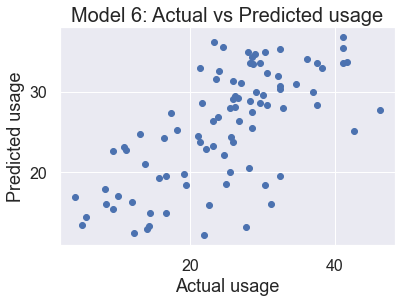

In [121]:
# Scattering the result: got more predicted power 
plt.figure(figsize=(6,4))
plt.scatter(y_test, pred)
plt.xlabel("Actual usage", fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel("Predicted usage", fontsize=18)
plt.yticks(fontsize=16)
plt.title("Model 6: Actual vs Predicted usage", fontsize=20)
plt.show()

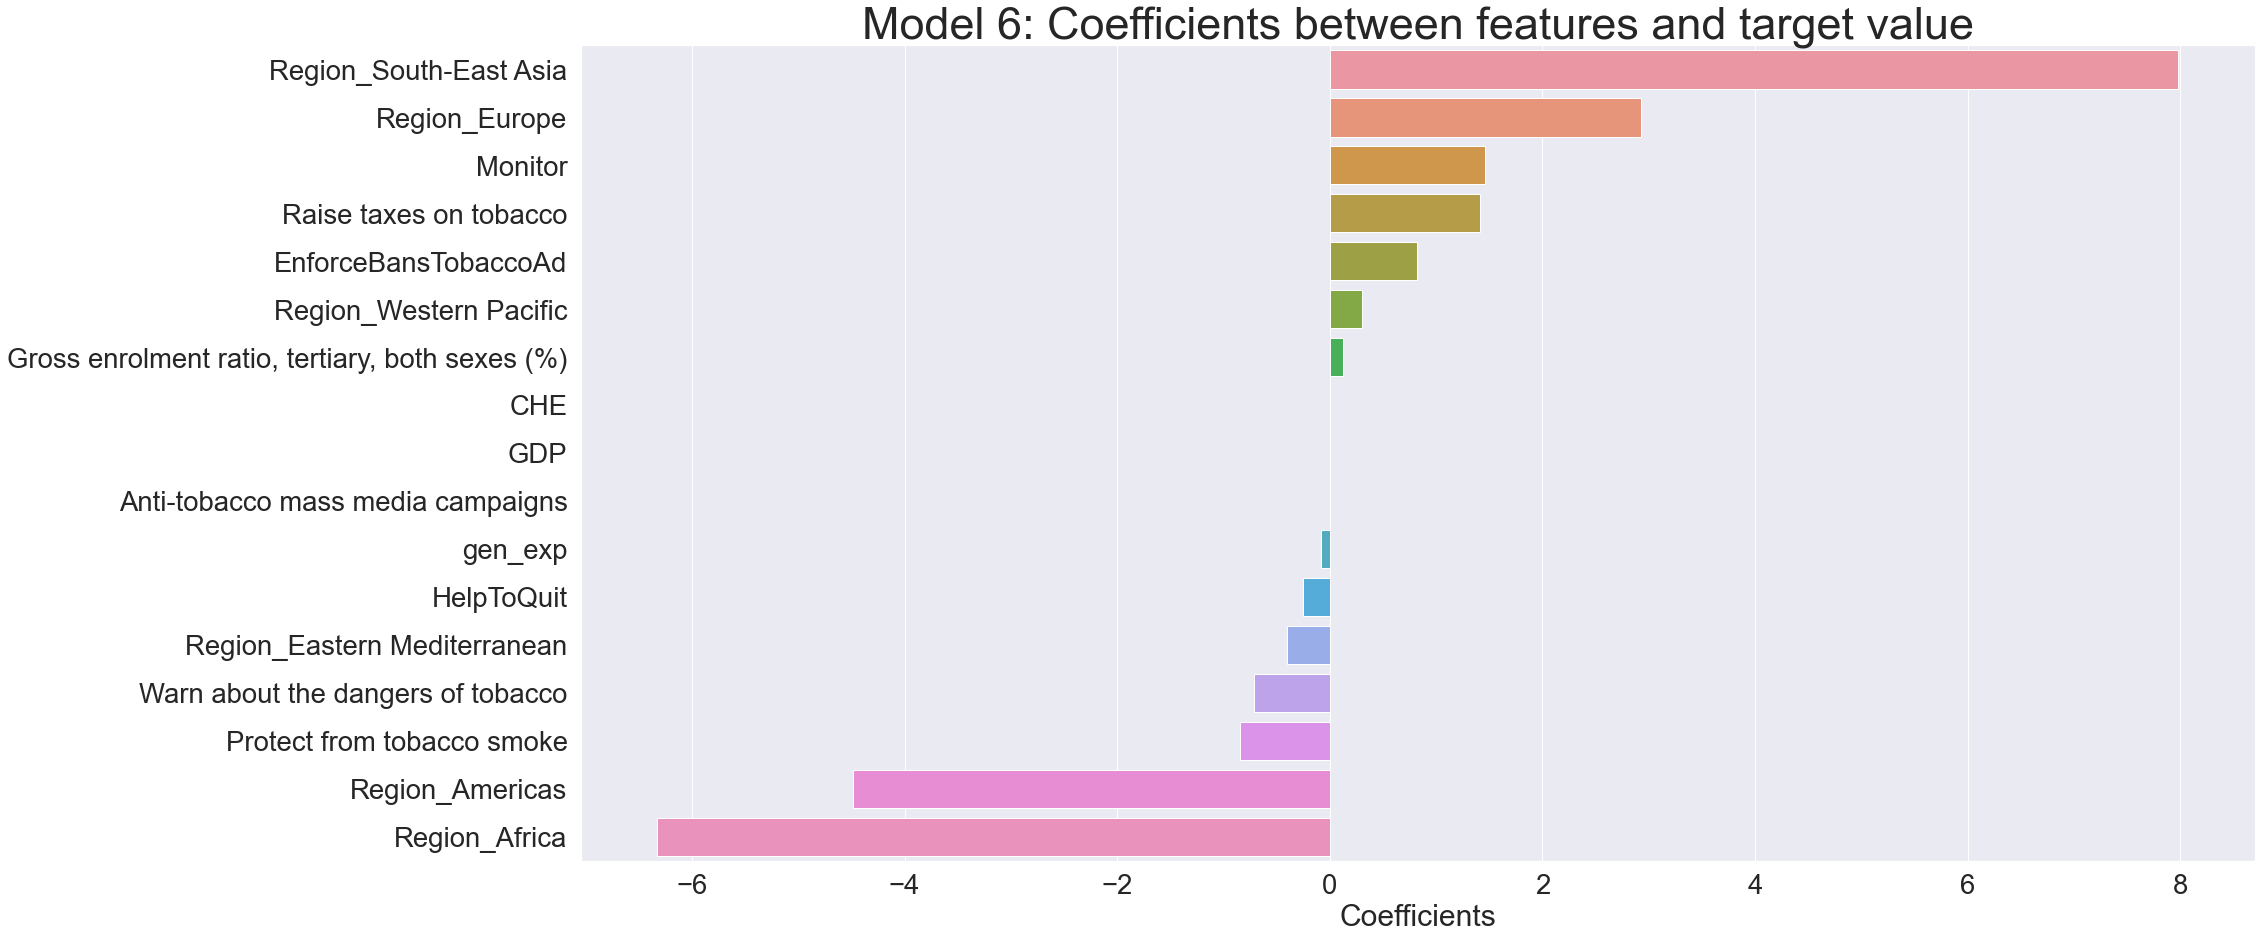

In [122]:
# Visualizing relationships between features and target
plt.figure(figsize=(30,15))
coef = pd.Series(model_6_reg.coef_, index=X_train.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)
plt.xlabel("Coefficients", fontsize=30)
plt.title("Model 6: Coefficients between features and target value", fontsize=45)
plt.show()